In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt

# Algorithm Developement

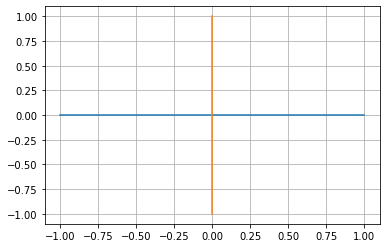

In [3]:
# points that do intersect
x_vals = [-1, 1, 0, 0]
y_vals = [0, 0, -1, 1]

# plot for reference
plt.plot(x_vals[:2], y_vals[:2])
plt.plot(x_vals[2:], y_vals[2:])
plt.grid()

In [4]:
# determine if line is in x or y direction
v1x = len(set(x_vals[0:2])) % 2 
v1y = len(set(y_vals[0:2])) % 2
print(f'{v1x=}, {v1y=}')

# determine equation for line once direction is determined
y_intersection = v1y*y_vals[0]
print(f'y={y_intersection}')

# determine if other line is in x or y direction
v2x = len(set(x_vals[2:])) % 2 
v2y = len(set(y_vals[2:])) % 2
print(f'{v2x=}, {v2y=}')

# determine equation for line once direction is determined
x_intersection = v2x*x_vals[2]
print(f'x={x_intersection}')

# check for intersection
if (x_vals[0] <= x_intersection <= x_vals[1]) and (x_vals[2] <= x_intersection <= x_vals[3]):
    print('intersects in the x')
if (y_vals[0] <= y_intersection <= y_vals[1]) and (y_vals[2] <= y_intersection <= y_vals[3]):
    print('intersects in the y')

v1x=0, v1y=1
y=0
v2x=1, v2y=0
x=0
intersects in the x
intersects in the y


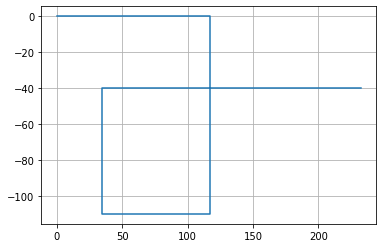

In [5]:
# points that do intersect
x_vals = [0, 117.5, 117.5, 35, 35, 232.5]
y_vals = [0, 0, -110, -110, -40, -40]
# x_vals = [0, 265, 265, 110]
# y_vals = [0, 0, -182.5, -182.5]

# plot for reference
plt.plot(x_vals, y_vals)
plt.grid()

In [6]:
# create a function that takes an x & y vector and finds intersections
from typing import List
Vector = List[float]

def does_intersect(x_vec: Vector, y_vec: Vector):
    # pick out latest segment
    x_last_vec = x_vec[-2:]
    y_last_vec = y_vec[-2:]
    print(f'{x_last_vec}, {y_last_vec}')

    # determine the x and y intersection values
    for i in range(len(x_vec) - 2):
        x_intersection = ((len(set(x_vec[i:i+2])) % 2) * x_vec[i]) + ((len(set(x_last_vec)) % 2) * x_last_vec[0])
        y_intersection = ((len(set(y_vec[i:i+2])) % 2) * y_vec[i]) + ((len(set(y_last_vec)) % 2) * y_last_vec[0])

        # determine if the intersection point is a part of both vectors
        a = bool(((min(x_vec[i:i+2]) <= x_intersection <= max(x_vec[i:i+2]))))
        b = bool((x_last_vec[0] <= x_intersection <= x_last_vec[1]))
        c = bool(((min(y_vec[i:i+2]) <= y_intersection <= max(y_vec[i:i+2]))))
        d = bool((y_last_vec[0] <= y_intersection <= y_last_vec[1]))
        
        print(f'{i=}, {x_intersection=}, {y_intersection=}, {x_vec[i:i+2]}, {y_vec[i:i+2]}, {a}, {b}, {c}, {d}')

        if (a and b) and (c and d):
            return True


does_intersect(x_vals, y_vals)

[35, 232.5], [-40, -40]
i=0, x_intersection=0, y_intersection=-40, [0, 117.5], [0, 0], True, False, False, True
i=1, x_intersection=117.5, y_intersection=-40, [117.5, 117.5], [0, -110], True, True, True, True


True

# Debugging

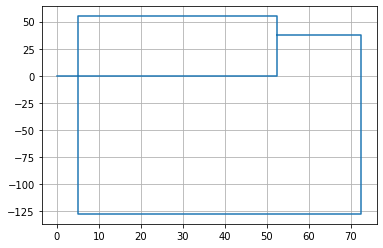

In [10]:
with open('log.csv', 'r') as f:
    points = f.readlines()
x_vals = [float(p.split(',')[0]) for p in points]
y_vals = [float(p.split(',')[1]) for p in points]
plt.plot(x_vals, y_vals)
plt.grid();

In [13]:
print(x_vals, '\n', y_vals)

[0.0, 52.5, 52.5, 5.0, 4.999999999999935, 72.49999999999994, 72.49999999999994, 52.49999999999994] 
 [0.0, 0.0, 55.0, 55.0, -127.5, -127.5, 37.5, 37.5]


In [11]:
does_intersect(x_vals, y_vals)

[72.49999999999994, 52.49999999999994], [37.5, 37.5]
i=0, x_intersection=0.0, y_intersection=37.5, [0.0, 52.5], [0.0, 0.0], True, False, False, True
i=1, x_intersection=52.5, y_intersection=37.5, [52.5, 52.5], [0.0, 55.0], True, False, True, True
i=2, x_intersection=0.0, y_intersection=92.5, [52.5, 5.0], [55.0, 55.0], False, False, False, False
i=3, x_intersection=0.0, y_intersection=37.5, [5.0, 4.999999999999935], [55.0, -127.5], False, False, True, True
i=4, x_intersection=0.0, y_intersection=-90.0, [4.999999999999935, 72.49999999999994], [-127.5, -127.5], False, False, False, False
i=5, x_intersection=72.49999999999994, y_intersection=37.5, [72.49999999999994, 72.49999999999994], [-127.5, 37.5], True, False, True, True
